In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

In [14]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"
df= pd.read_csv(url)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [12]:
df.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1987,Female,26.000000,1.624950,111.004920,yes,yes,3.0,3.0,Sometimes,no,2.704315,no,0.000000,0.322666,Sometimes,Public_Transportation,Obesity_Type_III
816,Male,23.451595,1.670227,75.000000,yes,yes,2.0,3.0,Sometimes,no,2.000000,no,0.129163,1.983678,Sometimes,Public_Transportation,Overweight_Level_I
1861,Female,25.653233,1.664940,110.922170,yes,yes,3.0,3.0,Sometimes,no,1.604075,no,0.029728,0.200122,Sometimes,Public_Transportation,Obesity_Type_III
2022,Female,25.976209,1.614484,104.999403,yes,yes,3.0,3.0,Sometimes,no,1.237557,no,0.083675,0.543761,Sometimes,Public_Transportation,Obesity_Type_III
394,Female,17.000000,1.530000,55.000000,yes,yes,2.0,3.0,Sometimes,no,1.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight


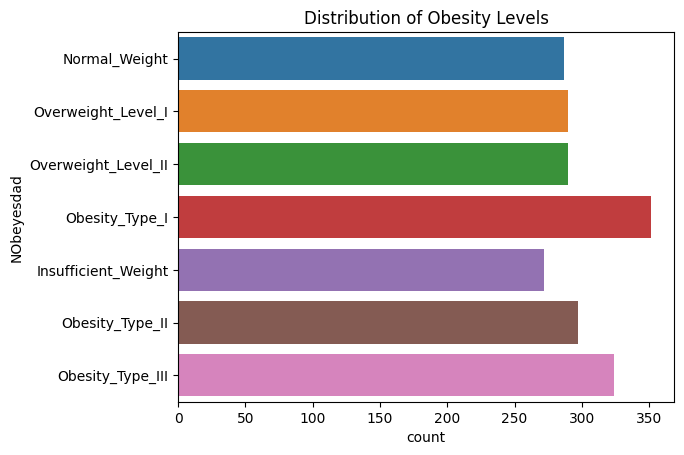

In [13]:
sns.countplot(y='NObeyesdad', data=df)
plt.title('Distribution of Obesity Levels')
plt.show()

In [16]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


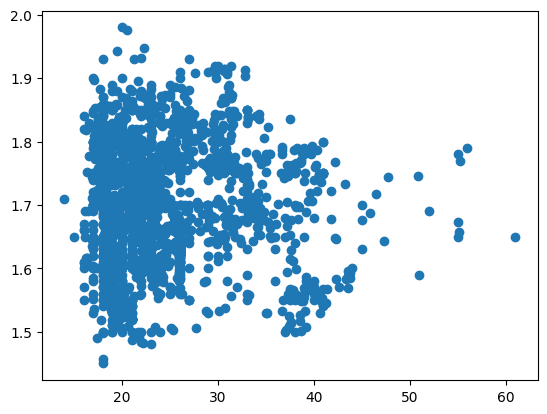

In [93]:
plt.scatter(df['Age'],df['Height'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [20]:
continues_coloumns=df.select_dtypes(include=['float64']).columns.tolist()

In [24]:
continues_coloumns

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [26]:
scaler=StandardScaler()

In [35]:
scaled_features=scaler.fit_transform(df[continues_coloumns])

In [38]:
scaled_features[0:3]

array([[-0.52212439, -0.87558934, -0.86255819, -0.7850187 ,  0.40415272,
        -0.01307326, -1.18803911,  0.56199675],
       [-0.52212439, -1.94759928, -1.16807699,  1.08834176,  0.40415272,
         1.61875854,  2.33975012, -1.08062463],
       [-0.20688898,  1.05402854, -0.36609013, -0.7850187 ,  0.40415272,
        -0.01307326,  1.16382038,  0.56199675]])

In [41]:
scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continues_coloumns))

In [42]:
scaled_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625
...,...,...,...,...,...,...,...,...
2106,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996
2107,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251
2108,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018
2109,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991


In [44]:
scaled_data=pd.concat([df.drop(columns=continues_coloumns),scaled_df],axis=1)

In [45]:
scaled_data


,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991


In [47]:
categorical_columns=scaled_data.select_dtypes(include=['object']).columns.tolist()

In [48]:
categorical_columns

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [49]:
categorical_columns.remove('NObeyesdad')

In [50]:
encoder=OneHotEncoder(sparse_output=False,drop='first')

In [51]:
encoder

OneHotEncoder(drop='first', sparse_output=False)

In [53]:
encoded_df=encoder.fit_transform(scaled_data[categorical_columns])

In [56]:
encoded_df[0:3]

array([[0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.]])

In [62]:
encoded_df=pd.DataFrame(encoded_df,columns=encoder.get_feature_names_out(categorical_columns))

In [63]:
encoded_df

,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2107,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2108,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2109,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [64]:
prepped_data=pd.concat([scaled_data.drop(columns=categorical_columns),encoded_df],axis=1)

In [65]:
prepped_data

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Obesity_Type_III,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2107,Obesity_Type_III,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2108,Obesity_Type_III,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2109,Obesity_Type_III,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [66]:
prepped_data['NObeyesdad']=prepped_data['NObeyesdad'].astype('category').cat.codes

In [67]:
prepped_data['NObeyesdad']

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 2111, dtype: int8

In [69]:
prepped_data.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [70]:
x=prepped_data.drop('NObeyesdad',axis=1)

In [71]:
y=prepped_data['NObeyesdad']

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [78]:
x_train.sample(5)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
1109,2.077377,1.429489,0.220825,-0.785019,-1.302200,1.238010,-0.012109,-1.036121,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1147,-0.107722,-0.017767,-0.235464,-0.785019,0.404153,0.618289,-0.098892,1.127108,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
918,-0.365119,0.305755,-0.289823,-0.265954,-2.167023,-0.013073,0.060496,-1.080625,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1924,-0.411051,0.921249,1.958078,1.088342,0.404153,0.854174,1.141170,0.292231,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
812,-0.803254,1.187730,0.006196,-0.785019,0.404153,0.262137,-0.037982,-0.846324,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [79]:
y_train.sample(5)

1420    2
883     5
588     0
1561    3
1654    3
Name: NObeyesdad, dtype: int8

# one vs all

In [81]:
model_ova=LogisticRegression(multi_class='ovr',max_iter=1000)

In [84]:
model_ova.fit(x_train,y_train)

C:\Users\2003j\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [85]:
y_pred_ova=model_ova.predict(x_test)

In [86]:
y_pred_ova

array([0, 0, 5, 4, 3, 2, 3, 6, 2, 5, 0, 0, 4, 5, 5, 5, 2, 2, 2, 1, 1, 3,
       3, 5, 2, 2, 2, 4, 6, 3, 2, 2, 5, 5, 3, 1, 3, 0, 4, 0, 5, 0, 4, 4,
       6, 4, 0, 2, 3, 5, 4, 0, 5, 3, 5, 1, 4, 4, 4, 3, 2, 6, 0, 6, 5, 2,
       2, 0, 3, 2, 4, 2, 0, 0, 2, 0, 0, 0, 5, 2, 5, 6, 4, 2, 1, 1, 3, 5,
       2, 2, 3, 6, 2, 5, 2, 1, 0, 0, 4, 3, 5, 3, 3, 5, 6, 4, 2, 2, 2, 3,
       3, 1, 4, 3, 4, 4, 0, 4, 1, 1, 4, 6, 4, 0, 2, 3, 1, 6, 5, 3, 4, 2,
       1, 0, 0, 5, 6, 1, 3, 0, 4, 3, 3, 2, 2, 3, 2, 3, 0, 5, 5, 6, 4, 0,
       3, 3, 4, 2, 5, 2, 1, 3, 3, 2, 4, 5, 6, 6, 6, 3, 2, 1, 1, 3, 3, 2,
       2, 2, 1, 5, 2, 3, 3, 3, 0, 0, 5, 4, 5, 5, 1, 5, 4, 5, 1, 3, 2, 1,
       3, 2, 3, 4, 6, 6, 5, 0, 2, 5, 1, 3, 0, 4, 6, 6, 6, 1, 6, 2, 6, 2,
       1, 4, 2, 2, 1, 5, 3, 4, 3, 5, 6, 0, 2, 4, 6, 2, 5, 0, 3, 6, 4, 5,
       4, 2, 5, 5, 1, 0, 2, 3, 6, 1, 4, 2, 3, 4, 5, 4, 2, 3, 4, 2, 1, 2,
       4, 2, 2, 4, 6, 2, 2, 0, 4, 6, 6, 4, 3, 0, 6, 4, 2, 4, 5, 0, 1, 1,
       2, 6, 6, 4, 1, 1, 0, 1, 2, 0, 2, 5, 6, 1, 6,

In [91]:
accuracy_score(y_test,y_pred_ova)*100


76.12293144208037

# one vs one

In [119]:
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(x_train,y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

In [116]:
y_pred_ovo=model_ovo.predict(x_test)

In [117]:
y_pred_ovo

array([0, 0, 6, 4, 3, 2, 3, 1, 2, 5, 0, 0, 4, 5, 1, 5, 2, 2, 6, 1, 1, 3,
       3, 5, 6, 5, 2, 4, 6, 2, 3, 2, 5, 5, 3, 1, 3, 0, 4, 0, 5, 0, 4, 4,
       6, 4, 0, 6, 3, 5, 4, 0, 5, 2, 6, 1, 4, 4, 4, 3, 6, 6, 0, 6, 5, 2,
       2, 0, 3, 2, 4, 5, 0, 0, 2, 0, 0, 0, 2, 2, 1, 6, 4, 2, 1, 1, 3, 5,
       6, 6, 3, 6, 2, 3, 5, 1, 0, 1, 4, 3, 2, 3, 3, 5, 6, 4, 2, 2, 6, 3,
       6, 1, 4, 3, 4, 4, 0, 4, 1, 1, 4, 6, 4, 0, 2, 3, 6, 6, 5, 3, 4, 6,
       0, 0, 0, 5, 2, 2, 3, 0, 4, 2, 3, 2, 2, 3, 2, 2, 0, 5, 5, 5, 4, 0,
       3, 3, 4, 2, 5, 6, 1, 3, 2, 2, 4, 6, 5, 6, 6, 3, 5, 1, 1, 3, 3, 5,
       2, 5, 1, 5, 2, 3, 2, 3, 0, 0, 1, 4, 5, 5, 1, 5, 4, 5, 1, 3, 6, 1,
       3, 2, 3, 4, 6, 6, 1, 0, 2, 5, 1, 3, 0, 4, 5, 6, 6, 6, 6, 2, 6, 6,
       1, 4, 2, 2, 1, 5, 3, 4, 3, 5, 6, 0, 2, 4, 6, 6, 5, 0, 3, 6, 4, 5,
       4, 2, 5, 5, 1, 0, 2, 3, 6, 1, 4, 6, 3, 4, 2, 4, 6, 3, 4, 2, 5, 2,
       4, 2, 6, 4, 1, 2, 2, 0, 4, 5, 6, 4, 3, 0, 6, 4, 2, 4, 5, 1, 1, 1,
       2, 6, 2, 4, 5, 1, 0, 1, 2, 0, 5, 5, 6, 5, 6,

In [118]:
accuracy_score(y_test,y_pred_ovo)*100

92.19858156028369

# Different test sizes


In [122]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.4,random_state=42,stratify=y)
model_ova_=LogisticRegression(multi_class='ovr',max_iter=1000)
model_ova_.fit(X_train,Y_train)

C:\Users\2003j\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [126]:
y_pred_ova_=model_ova_.predict(X_test)
y_pred_ova_

array([1, 4, 0, 6, 0, 4, 0, 6, 2, 0, 0, 4, 4, 1, 3, 3, 0, 5, 6, 3, 2, 2,
       1, 3, 1, 3, 6, 3, 0, 4, 3, 5, 3, 4, 4, 4, 2, 1, 1, 0, 0, 2, 4, 4,
       4, 3, 5, 5, 3, 2, 3, 0, 2, 2, 5, 4, 0, 4, 3, 6, 4, 0, 0, 5, 2, 0,
       1, 3, 6, 3, 5, 4, 3, 6, 1, 2, 2, 2, 1, 3, 2, 4, 4, 2, 4, 3, 3, 2,
       4, 1, 6, 6, 4, 5, 3, 2, 1, 0, 3, 0, 0, 2, 3, 3, 0, 2, 1, 2, 2, 1,
       2, 2, 1, 4, 6, 5, 2, 6, 2, 0, 4, 4, 1, 0, 1, 5, 5, 2, 5, 0, 2, 4,
       6, 2, 4, 1, 2, 3, 5, 4, 3, 2, 2, 4, 3, 1, 5, 1, 2, 1, 3, 3, 1, 2,
       3, 5, 3, 3, 2, 1, 0, 4, 1, 3, 1, 3, 1, 1, 2, 1, 3, 4, 4, 2, 5, 3,
       2, 0, 4, 6, 5, 1, 0, 5, 6, 1, 4, 2, 3, 2, 6, 0, 4, 3, 0, 2, 1, 4,
       2, 3, 6, 6, 0, 6, 4, 2, 1, 5, 1, 2, 6, 2, 3, 4, 2, 1, 6, 3, 3, 0,
       2, 2, 2, 2, 0, 3, 6, 1, 5, 3, 1, 5, 3, 5, 3, 0, 4, 6, 1, 1, 5, 2,
       3, 3, 3, 2, 5, 6, 3, 3, 0, 0, 2, 4, 3, 5, 2, 4, 6, 0, 3, 1, 2, 2,
       3, 0, 0, 5, 5, 2, 2, 5, 4, 3, 4, 3, 0, 3, 3, 3, 0, 3, 0, 4, 5, 1,
       2, 1, 4, 5, 2, 4, 6, 0, 0, 5, 5, 2, 3, 0, 5,

In [127]:
accuracy_score(Y_test,y_pred_ova_)

0.7562130177514793

In [129]:
model_ovo_= OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo_.fit(X_train,Y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

In [130]:
y_pred_ovo_=model_ovo_.predict(X_test)

In [131]:
y_pred_ovo_

array([1, 4, 0, 6, 0, 4, 0, 6, 6, 0, 0, 4, 4, 1, 3, 3, 0, 5, 6, 3, 2, 6,
       5, 3, 1, 3, 6, 3, 0, 4, 3, 5, 3, 4, 4, 4, 2, 1, 2, 0, 0, 2, 4, 4,
       4, 2, 1, 5, 3, 2, 3, 0, 2, 2, 5, 4, 0, 4, 3, 6, 4, 0, 0, 1, 5, 0,
       1, 3, 6, 3, 5, 4, 2, 6, 1, 2, 2, 6, 1, 3, 2, 4, 4, 2, 4, 3, 3, 5,
       4, 1, 5, 3, 4, 5, 3, 2, 0, 0, 2, 0, 0, 2, 3, 3, 0, 2, 5, 6, 2, 6,
       2, 2, 1, 4, 6, 5, 6, 2, 6, 0, 4, 4, 1, 0, 5, 5, 1, 2, 1, 0, 6, 4,
       6, 6, 4, 1, 6, 2, 0, 4, 3, 2, 2, 4, 3, 1, 5, 1, 2, 1, 3, 3, 0, 2,
       3, 5, 3, 3, 2, 2, 0, 4, 1, 3, 1, 3, 1, 1, 5, 5, 3, 4, 4, 2, 5, 3,
       2, 0, 4, 5, 5, 1, 1, 1, 6, 1, 4, 2, 2, 2, 6, 0, 4, 3, 0, 2, 5, 4,
       2, 3, 6, 6, 0, 6, 4, 2, 1, 6, 1, 2, 6, 6, 3, 4, 2, 1, 5, 3, 3, 0,
       2, 6, 6, 2, 0, 2, 1, 1, 3, 2, 1, 5, 3, 5, 3, 0, 4, 6, 1, 1, 5, 2,
       3, 3, 3, 2, 5, 6, 3, 3, 0, 0, 2, 4, 3, 5, 2, 4, 6, 0, 6, 1, 3, 6,
       3, 0, 1, 5, 5, 5, 6, 2, 4, 2, 4, 3, 0, 3, 3, 3, 0, 3, 0, 4, 5, 1,
       2, 1, 4, 5, 2, 4, 1, 0, 0, 5, 2, 2, 3, 0, 5,

In [133]:
accuracy_score(Y_test,y_pred_ovo_)*100

91.36094674556213

In [135]:
coeff=np.abs(model_ova_.coef_).mean(axis=0)

In [136]:
features=x_train.columns

Text(0, 0.5, 'Features of the data')

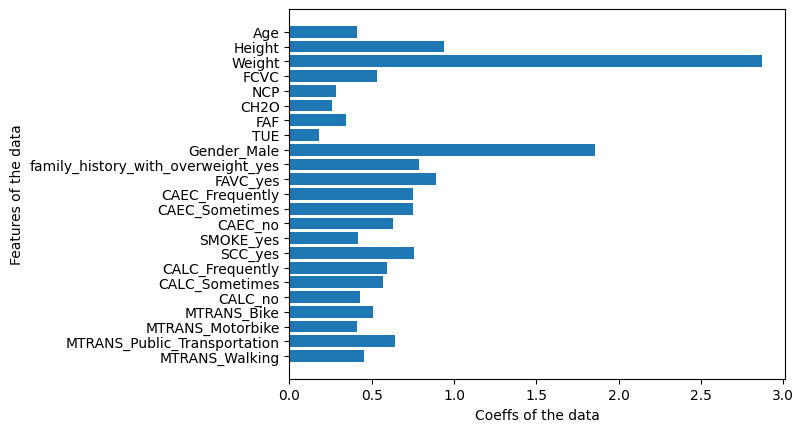

In [140]:
plt.barh(features,coeff)
plt.gca().invert_yaxis()
plt.xlabel('Coeffs of the data')
plt.ylabel('Features of the data')

# Overall:- Weight > Gender(Male) > Height